# Using `pyqg` to generate 2D turbulences

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pyqg

In [4]:
# create the model object
m = pyqg.BTModel(L=2.*np.pi, nx=256,
                 beta=0., H=1., rek=0., rd=None,
                 tmax=40, dt=0.001, taveint=1,
ntd=4)
# in this example we used ntd=4, four threads
# if your machine has more (or fewer) cores available, you could try changing it

INFO:  Logger initialized
INFO:  Kernel initialized


In [5]:
fk = m.wv != 0
ckappa = np.zeros_like(m.wv2)
ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1
nhx,nhy = m.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m.fft( Pi )
KEaux = m.spec_var( m.wv*Pi_hat )
pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -m.wv2*pih
qi = m.ifft(qih)

In [6]:
# initialize the model with that initial condition
m.set_q(qi)

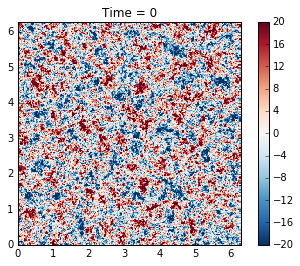

In [7]:
#define a quick function for plotting and visualize the initial condition
def plot_q(m, qmax=20):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r') 
    pc.set_clim([-qmax, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    
    out = m.x,m.y,m.q.squeeze(),m.u[0],m.v[0]
    plt.show()
    return out

out0 = plot_q(m)

#### Store the evoluting turbulent flows.

In [8]:
outt = []

INFO: Step: 1000, Time: 1.00e+00, KE: 4.97e-01, CFL: 0.112
INFO: Step: 2000, Time: 2.00e+00, KE: 4.95e-01, CFL: 0.109
INFO: Step: 3000, Time: 3.00e+00, KE: 4.95e-01, CFL: 0.093
INFO: Step: 4000, Time: 4.00e+00, KE: 4.94e-01, CFL: 0.103
INFO: Step: 5000, Time: 5.00e+00, KE: 4.94e-01, CFL: 0.099


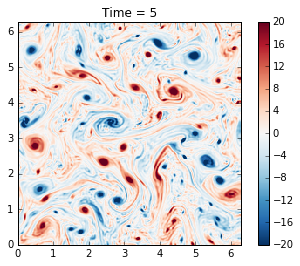

INFO: Step: 6000, Time: 6.00e+00, KE: 4.94e-01, CFL: 0.103
INFO: Step: 7000, Time: 7.00e+00, KE: 4.93e-01, CFL: 0.134
INFO: Step: 8000, Time: 8.00e+00, KE: 4.93e-01, CFL: 0.103
INFO: Step: 9000, Time: 9.00e+00, KE: 4.93e-01, CFL: 0.104
INFO: Step: 10000, Time: 1.00e+01, KE: 4.93e-01, CFL: 0.105


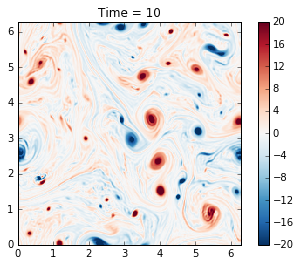

INFO: Step: 11000, Time: 1.10e+01, KE: 4.93e-01, CFL: 0.096
INFO: Step: 12000, Time: 1.20e+01, KE: 4.93e-01, CFL: 0.097
INFO: Step: 13000, Time: 1.30e+01, KE: 4.93e-01, CFL: 0.104
INFO: Step: 14000, Time: 1.40e+01, KE: 4.93e-01, CFL: 0.094
INFO: Step: 15000, Time: 1.50e+01, KE: 4.93e-01, CFL: 0.094


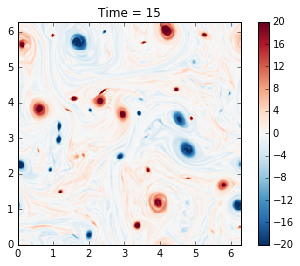

INFO: Step: 16000, Time: 1.60e+01, KE: 4.93e-01, CFL: 0.092
INFO: Step: 17000, Time: 1.70e+01, KE: 4.93e-01, CFL: 0.087
INFO: Step: 18000, Time: 1.80e+01, KE: 4.93e-01, CFL: 0.092
INFO: Step: 19000, Time: 1.90e+01, KE: 4.93e-01, CFL: 0.111
INFO: Step: 20000, Time: 2.00e+01, KE: 4.93e-01, CFL: 0.093


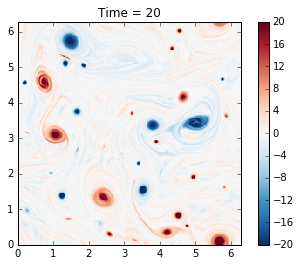

INFO: Step: 21000, Time: 2.10e+01, KE: 4.93e-01, CFL: 0.100
INFO: Step: 22000, Time: 2.20e+01, KE: 4.93e-01, CFL: 0.103
INFO: Step: 23000, Time: 2.30e+01, KE: 4.93e-01, CFL: 0.099
INFO: Step: 24000, Time: 2.40e+01, KE: 4.93e-01, CFL: 0.092
INFO: Step: 25000, Time: 2.50e+01, KE: 4.93e-01, CFL: 0.087


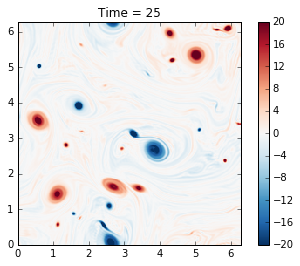

INFO: Step: 26000, Time: 2.60e+01, KE: 4.93e-01, CFL: 0.102
INFO: Step: 27000, Time: 2.70e+01, KE: 4.93e-01, CFL: 0.094
INFO: Step: 28000, Time: 2.80e+01, KE: 4.93e-01, CFL: 0.094
INFO: Step: 29000, Time: 2.90e+01, KE: 4.93e-01, CFL: 0.092
INFO: Step: 30000, Time: 3.00e+01, KE: 4.93e-01, CFL: 0.098


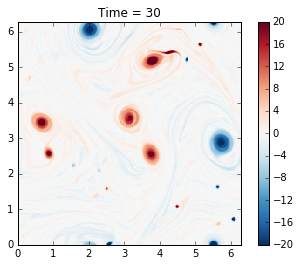

INFO: Step: 31000, Time: 3.10e+01, KE: 4.93e-01, CFL: 0.113
INFO: Step: 32000, Time: 3.20e+01, KE: 4.93e-01, CFL: 0.112
INFO: Step: 33000, Time: 3.30e+01, KE: 4.93e-01, CFL: 0.099
INFO: Step: 34000, Time: 3.40e+01, KE: 4.93e-01, CFL: 0.096
INFO: Step: 35000, Time: 3.50e+01, KE: 4.93e-01, CFL: 0.095


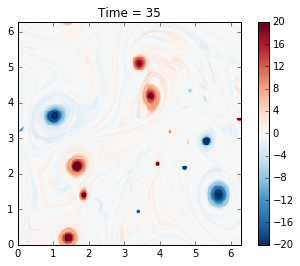

INFO: Step: 36000, Time: 3.60e+01, KE: 4.93e-01, CFL: 0.102
INFO: Step: 37000, Time: 3.70e+01, KE: 4.93e-01, CFL: 0.097
INFO: Step: 38000, Time: 3.80e+01, KE: 4.93e-01, CFL: 0.103
INFO: Step: 39000, Time: 3.90e+01, KE: 4.93e-01, CFL: 0.106
INFO: Step: 40000, Time: 4.00e+01, KE: 4.92e-01, CFL: 0.111


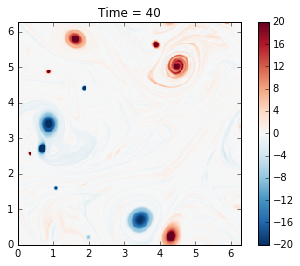

In [9]:
for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=5): 
    outt.append(plot_q(m))

### Plot the vector fields (unit length / directionless)

In [10]:
def plot_qui(cx,cy,vx,vy):
    plt.figure(figsize=(14,14))
    scaling = np.sqrt(vx**2 + vy**2)
    vx_,vy_ = vx/scaling, vy/scaling
    
    ## default: plot every 3 pixels...
    plt.quiver(cx[::3,::3],cy[::3,::3],vx_[::3,::3],vy_[::3,::3],headwidth=0,scale=40)

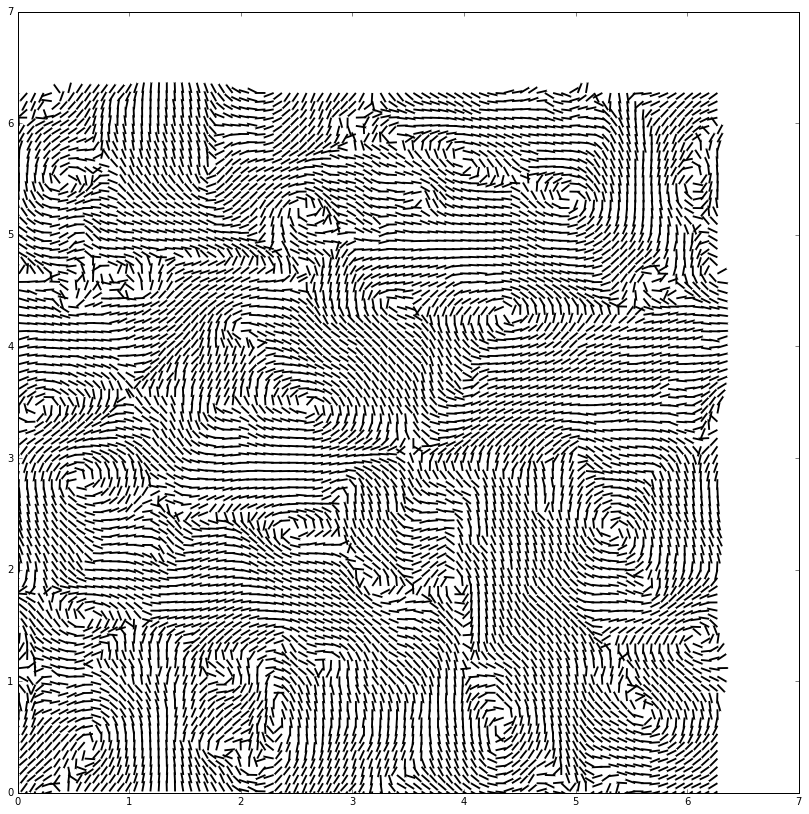

In [11]:
## time = 5
plot_qui(outt[0][0],outt[0][1],outt[0][3],outt[0][4])

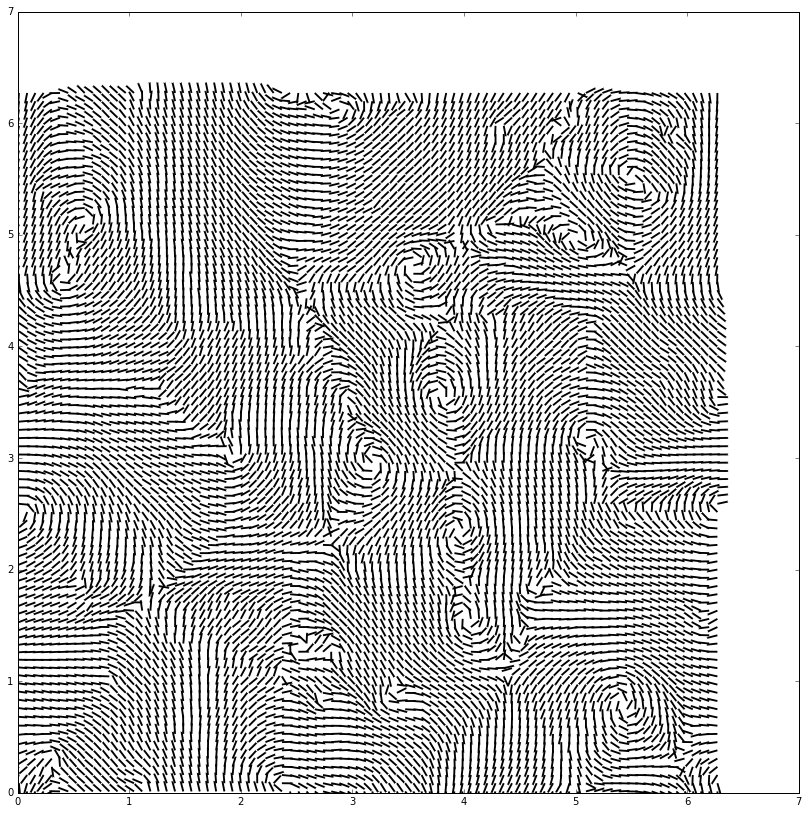

In [12]:
# time = 10
plot_qui(outt[1][0],outt[1][1],outt[1][3],outt[1][4])

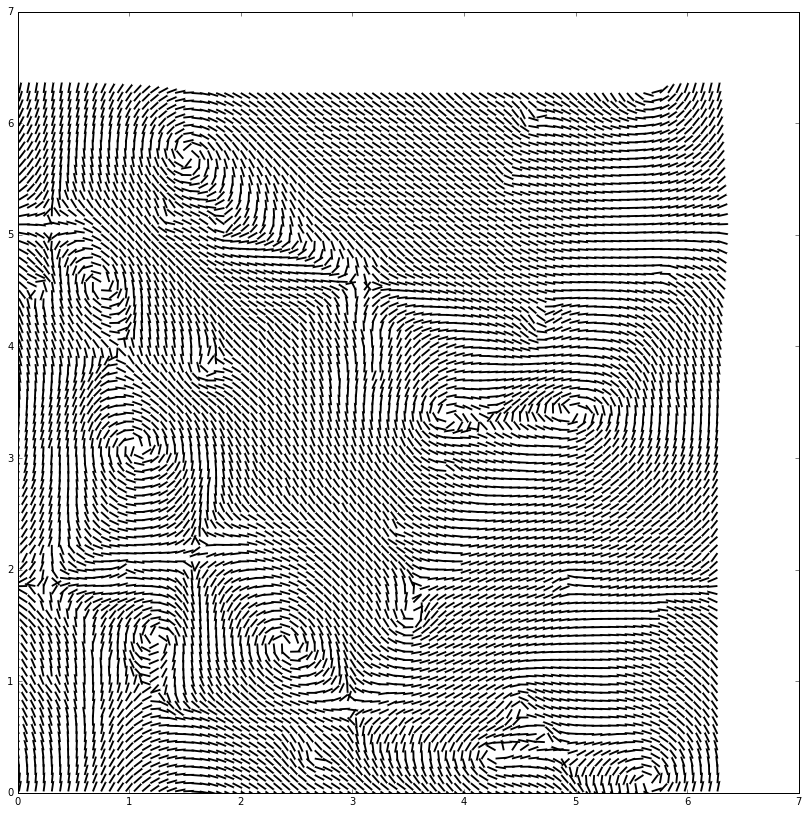

In [13]:
# time = 20
plot_qui(outt[3][0],outt[3][1],outt[3][3],outt[3][4])

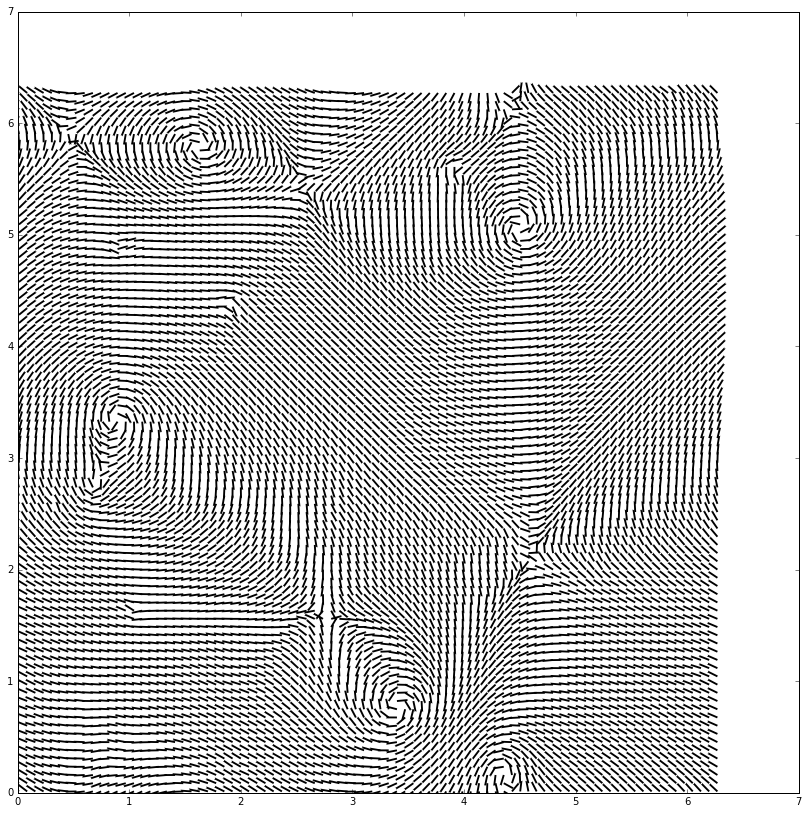

In [14]:
# time = 50
plot_qui(outt[7][0],outt[7][1],outt[7][3],outt[7][4])